# Learning and Decision Making

## Laboratory 4: Partially observable Markov decision problems

In the end of the lab, you should submit all code/answers written in the tasks marked as "Activity n. XXX", together with the corresponding outputs and any replies to specific questions posed to the e-mail <adi.tecnico@gmail.com>. Make sure that the subject is of the form [&lt;group n.&gt;] LAB &lt;lab n.&gt;.

### 1. Modeling

Consider once again the guessing game domain described in the Homework and which you described as a POMDP.

Recall that:

* The opponent can hold one of two cards in hand: an Ace of Clubs (A&clubs;) and an Ace of Diamonds (A&diams;). The agent must guess which card the opponent is holding. 

* For every right answer, the agent wins 1EUR, and every wrong answer costs the agent 1EUR. 

* The agent can also try to _peek_. 

* When the agent peeks, it sees the right card with a probability of 0.9 and the wrong card with probability 0.1.

* The game restarts whenever the agent makes a guess.

Consider throughout that $\gamma=0.9$.

---

#### Activity 1.        

Implement your POMDP in Python. In particular,

* Create a list with all the states;
* Create a list with all the actions;
* Create a list with all the observations
* For each action, define a `numpy` array with the corresponding transition probabilities;
* For each action, define a `numpy` array with the corresponding observation probabilities;
* Define a `numpy`array with the cost that you defined in your homework.

The order for the states and actions used in the transition probability and cost matrices should match that in the lists of states and actions. 

**Note**: Don't forget to import `numpy`.

---

In [200]:
import numpy as np

states = ["clubs", "diamonds"]
actions = ["peek","guess-clubs", "guess-diamonds"]
observations = ["obs-clubs", "obs-diamonds", "obs-nothing"]

Ppeek = np.array([[1, 0],
                  [0, 1]])

Pguess_clubs = np.array([[0.5, 0.5],
                         [0.5, 0.5]]) 

Pguess_diamonds = np.array([[0.5, 0.5],
                            [0.5, 0.5]])


Opeek = np.array([[0.9, 0.1, 0],
                  [0.1, 0.9, 0]])

Oguess_clubs = np.array([[0, 0, 1],
                         [0, 0, 1]])

Oguess_diamonds = np.array([[0, 0, 1],
                            [0, 0, 1]])

Cost = np.array([[0.5, 0, 1],
                 [0.5, 1, 0]])

#########################################################################################################

action_matrices = {"peek":Ppeek, "guess-clubs":Pguess_clubs, "guess-diamonds":Pguess_diamonds}
action_to_observation = {"peek":Opeek, "guess-clubs":Oguess_clubs, "guess-diamonds":Oguess_diamonds}

state_map = {"clubs":0, "diamonds":1}
obs_map = {"obs-clubs":0, "obs-diamonds":1, "obs-nothing":2}
action_map = {"peek":0, "guess-clubs":1, "guess-diamonds":2}



### 2. Sampling

You are now going to sample random trajectories of your POMDP and observe the impact it has on the corresponding belief.

---

#### Activity 2.

Generate a random POMDP trajectory using a uniformly random policy. In particular, from a random initial state $x_0$ generate:

1. A sequence of 10,000 states by selecting the actions uniformly at random;
2. The corresponding sequence of 10,000 actions;
3. The corresponding sequence of 10,000 observations.

---

In [201]:
initial_state = np.random.choice(states)

states_sequence = [initial_state]
action_sequence = []
observation_sequence = []

for i in range(10000):
    action = np.random.choice(actions)
    action_sequence = action_sequence + [action]
    action_matrix = action_matrices[action]
    
    current_state = state_map[states_sequence[i]]        
    next_state = np.random.choice(states, p=action_matrix[current_state])
    
    states_sequence = states_sequence + [next_state]
    
    observation_matrix = action_to_observation[action]
    new_observation = np.random.choice(observations, p=observation_matrix[current_state])
    observation_sequence = observation_sequence + [new_observation]
    
    
    
for i in range(10000):
    print(states_sequence[i], "->", action_sequence[i], ":", observation_sequence[i])


diamonds -> guess-diamonds : obs-nothing
clubs -> guess-clubs : obs-nothing
clubs -> guess-diamonds : obs-nothing
clubs -> guess-clubs : obs-nothing
diamonds -> guess-diamonds : obs-nothing
clubs -> guess-diamonds : obs-nothing
clubs -> guess-clubs : obs-nothing
clubs -> guess-clubs : obs-nothing
clubs -> guess-diamonds : obs-nothing
diamonds -> guess-diamonds : obs-nothing
clubs -> peek : obs-diamonds
clubs -> guess-clubs : obs-nothing
diamonds -> guess-clubs : obs-nothing
clubs -> guess-clubs : obs-nothing
clubs -> peek : obs-clubs
clubs -> guess-diamonds : obs-nothing
clubs -> peek : obs-clubs
clubs -> guess-clubs : obs-nothing
clubs -> guess-clubs : obs-nothing
clubs -> peek : obs-clubs
clubs -> guess-clubs : obs-nothing
clubs -> guess-clubs : obs-nothing
clubs -> guess-diamonds : obs-nothing
diamonds -> peek : obs-diamonds
diamonds -> guess-clubs : obs-nothing
diamonds -> peek : obs-diamonds
diamonds -> guess-diamonds : obs-nothing
clubs -> guess-clubs : obs-nothing
diamonds -> gu

---

#### Activity 3.

For the POMDP trajectory generated in Activity 2, compute the corresponding sequence of beliefs, assuming that the initial belief is $\mathbf{b}_0=[0.5, 0.5]$. Report the resulting beliefs, ignoring duplicate beliefs or beliefs whose distance is smaller than $10^{-4}$.

**Note 1:** You may want to define a function `belief_update` that receives a belief, an action and an observation and returns the updated belief.

**Note 2:** To compute the distance between vectors, you may find useful `numpy`'s function `linalg.norm`.


---

In [204]:
belief = np.array([0.5, 0.5])
belief_sequence = [belief]
epsilon = 1e-4

import math


def belief_update(belief, action, observation):
    updated_belief = np.array([])
    
    action_matrix = action_matrices[action]
    obs_matrix = action_to_observation[action]
    obs_index = obs_map[observation]
    
    diag_matrix = np.diag(obs_matrix[:,obs_index])
    updated_belief = np.dot(np.dot(belief, action_matrix), diag_matrix)
    updated_belief = updated_belief / np.sum(updated_belief)

    return updated_belief

res_aux = [belief]

for i in range(10000):
    action = action_sequence[i]
    observation = observation_sequence[i]
    updated_belief = belief_update(belief, action, observation)
    
    
    exists = False
    for b in belief_sequence:
        difference = np.linalg.norm(b-updated_belief)
        if (difference < epsilon):
            exists = True
            break
    if (not exists):
        belief_sequence = belief_sequence + [updated_belief]

    belief = updated_belief

            
    

for belief in belief_sequence:
    print(belief)
    

[0.500000 0.500000]
[0.100000 0.900000]
[0.900000 0.100000]
[0.987805 0.012195]
[0.012195 0.987805]
[0.998630 0.001370]
[0.001370 0.998630]
[0.000152 0.999848]
[0.999848 0.000152]
[0.999983 0.000017]
[0.000017 0.999983]


### 3. Solution methods

In this section you are going to compare different non-exact solution methods.

---

#### Activity 4

Compute the solution for the underlying MDP and report the corresponding optimal policy and optimal cost-to-go. 

** Note:** You may reuse code from previous labs.

---

In [205]:
import time as time


def value_iteration(cost_matrix, discount):
    i = 0
    err = 1
    J = np.zeros(len(cost_matrix[:,0]))
    start = time.time()
    while err > 1e-8:
        Q = {}
        Qlist = []
        
        for action, matrix in action_matrices.items():
            Q[action] = cost_matrix[:,action_map[action]] + np.multiply(discount, np.dot(matrix, J))
            Qlist = Qlist + [Q[action]]
        
        #print(Qlist)            
        
        Jnew = np.min(Qlist, axis = 0)
        err = np.linalg.norm(Jnew - J)
        i +=1
        
        J = Jnew
    end = time.time()
    return J, i, end - start

discount_factor = 0.9
J_Optimal, iterations, performance = value_iteration(Cost, discount_factor)
print("Optimal J =")
print(J_Optimal, "\n")
print("Calculated in :", iterations, "iterations for", performance, "seconds")

###########################################################################################################

def generate_P_Pi(policy_matrix, probability_matrices):
    
    Ppi = np.zeros(shape = (2,2))
    for x in range(np.shape(policy_matrix)[0]):
        for y in range(np.shape(policy_matrix)[1]):
            Ppi[x] =  Ppi[x] + np.multiply (policy_matrix[x][y], (probability_matrices[y])[x])
    return Ppi


def generate_C_Pi(policy_matrix, cost_matrix):
    Cpi = np.zeros(shape = (2))
    for x in range(np.shape(policy_matrix)[0]):
        for y in range(np.shape(policy_matrix)[1]):
            Cpi[x] =  Cpi[x] + np.multiply (policy_matrix[x][y], cost_matrix[x][y])
    return Cpi


def compute_cost_to_go(Ppi, Cpi, discount):
    I = np.identity(Ppi.shape[0])
    scaled_p = np.multiply(discount, Ppi)
    subtraction = np.subtract(I, scaled_p)
    inversion = np.linalg.inv(subtraction)
    J = np.dot(inversion, Cpi)
    return J

###########################################################################################################

def policy_iteration(Ppi, Cpi, cost_matrix, discount):
    Pi = np.ones((len(cost_matrix[:,0]), len(cost_matrix[0])))
    i = 0
    finished = False
    start = time.time()
    while not finished:
        J = compute_cost_to_go(Ppi, Cpi, 0.99)
        Q = {}
        Qlist = []
        
        for action, matrix in action_matrices.items():
            Q[action] = (cost_matrix[:,action_map[action]] + np.multiply(discount, np.dot(matrix, J))).reshape(2,1)
            Qlist = Qlist + [Q[action]]
        
        Pinew = np.zeros(shape = (2, 3))
        
        for action in actions:
            Pinew[:, action_map[action], None] = np.isclose(Q[action], np.min(Qlist, axis = 0), 
                                                    atol = 1e-10, rtol = 1e-10).astype(int)

        
        Pinew = Pinew / np.sum(Pinew, axis = 1, keepdims = True)
        
        finished = (Pi == Pinew).all()
        
        Pi = Pinew
        i +=1
        
    end = time.time()
    return Pi, i, end - start

###########################################################################################################

Pi = np.array([[1, 0, 0],
               [1, 0, 0]])
action_matrices_list = []
for _, matrix in action_matrices.items():
    action_matrices_list = action_matrices_list + [matrix]
    
Ppi = generate_P_Pi(Pi, action_matrices_list)        
Cpi = generate_C_Pi(Pi, Cost)
Pi_Optimal, iters, perf = policy_iteration(Ppi, Cpi, Cost, 0.99)

print("Ppi =")
print(Ppi, "\n")

print("Cpi =")
print(Cpi, "\n")


print("Optimal Pi =")
print(Pi_Optimal, "\n")
print("Calculated in :", iters, "iterations for", perf, "seconds")


Optimal J =
[0.000000 0.000000] 

Calculated in : 1 iterations for 0.0004978179931640625 seconds
Ppi =
[[1.000000 0.000000]
 [0.000000 1.000000]] 

Cpi =
[0.500000 0.500000] 

Optimal Pi =
[[0.000000 1.000000 0.000000]
 [0.000000 0.000000 1.000000]] 

Calculated in : 2 iterations for 0.0004642009735107422 seconds


---

#### Activity 5

For each of the beliefs computed in Activity 3, compute the action prescribed by:

* The MLS heuristic;
* The AV heuristic;
* The Q-MDP heuristic.

---

In [206]:
action_map_inv = {v: k for k, v in action_map.items()}

def mls_heuristic(belief):
    return action_map_inv[np.argmax(Pi_Optimal[np.argmax(belief)])]

###########################################################################################################

def av_heuristic(belief):
    action_votes = np.zeros(shape = (3))
    
    for state in range(len(belief)):
        action = Pi_Optimal[state]
        index = np.argmax(action)
                
        action_votes[index] = action_votes[index] + belief[state]
        
    return action_map_inv[np.argmax(action_votes)]

###########################################################################################################

def qmdp_heuristic(belief):
    
    Q = {}
    Qlist = []
    
    for action, matrix in action_matrices.items():
        Q[action] = (Cost[:,action_map[action]] + np.multiply(discount_factor, np.dot(matrix, J_Optimal))).reshape(2,1)
        Qlist = Qlist + [np.dot(belief, Q[action])]
        
    return action_map_inv[np.argmin(Qlist)]

###########################################################################################################

belief = [0.9, 0.1]

print("Optimal Policy for the underlying MDP:")
print(Pi_Optimal,"\n")

np.set_printoptions(formatter={'float': lambda x: "{0:0.6f}".format(x)})

for belief in belief_sequence:
    mls = mls_heuristic(belief)
    av = av_heuristic(belief)
    qmdp = qmdp_heuristic(belief)
        
    print("Belief =",belief,"\tMLS:",mls,"\tAV:",av,"\tQ-MDP:",qmdp)
    

Optimal Policy for the underlying MDP:
[[0.000000 1.000000 0.000000]
 [0.000000 0.000000 1.000000]] 

Belief = [0.500000 0.500000] 	MLS: guess-clubs 	AV: guess-clubs 	Q-MDP: peek
Belief = [0.100000 0.900000] 	MLS: guess-diamonds 	AV: guess-diamonds 	Q-MDP: guess-diamonds
Belief = [0.900000 0.100000] 	MLS: guess-clubs 	AV: guess-clubs 	Q-MDP: guess-clubs
Belief = [0.987805 0.012195] 	MLS: guess-clubs 	AV: guess-clubs 	Q-MDP: guess-clubs
Belief = [0.012195 0.987805] 	MLS: guess-diamonds 	AV: guess-diamonds 	Q-MDP: guess-diamonds
Belief = [0.998630 0.001370] 	MLS: guess-clubs 	AV: guess-clubs 	Q-MDP: guess-clubs
Belief = [0.001370 0.998630] 	MLS: guess-diamonds 	AV: guess-diamonds 	Q-MDP: guess-diamonds
Belief = [0.000152 0.999848] 	MLS: guess-diamonds 	AV: guess-diamonds 	Q-MDP: guess-diamonds
Belief = [0.999848 0.000152] 	MLS: guess-clubs 	AV: guess-clubs 	Q-MDP: guess-clubs
Belief = [0.999983 0.000017] 	MLS: guess-clubs 	AV: guess-clubs 	Q-MDP: guess-clubs
Belief = [0.000017 0.999983] 

---

#### Activity 6

Suppose that the optimal cost-to-go function for the POMDP can be represented using the $\alpha$-vectors

$$
\left\{
\begin{bmatrix}
2.795\\
3.795
\end{bmatrix},
\begin{bmatrix}
3.795\\
2.795
\end{bmatrix},
\begin{bmatrix}
3.105\\
3.105
\end{bmatrix}\right\}$$

corresponding to the actions 'Guess clubs', 'Guess diamonds' and 'Peek', respectively. Represent the optimal cost-to-go function and compare the optimal policy with the MDP heuristics from Activity 5 in the beliefs computed in Activity 3.

** Note: ** Don't forget to import `matplotlib`, and use the magic `%matplotlib notebook`.

---

<IPython.core.display.Javascript object>


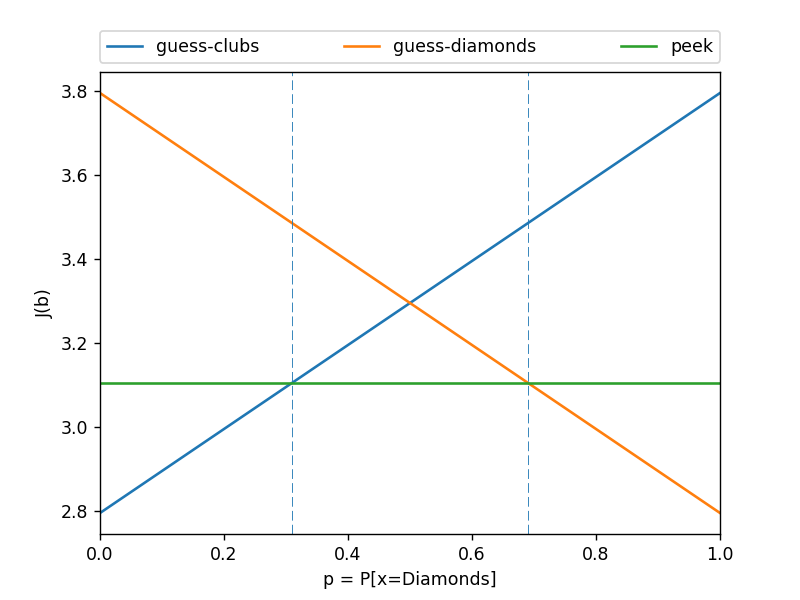

For any belief (that the current state is diamonds) lesser than ~ 0.31 this method would choose the action guess-clubs.
For any belief (that the current state is diamonds) larger than ~ 0.69 this method would choose the action guess-diamonds.
For anything in between, it would choose peek.
Comparing both results, we can conclude that this method is a lot more precise than the non-exact methods.


In [210]:
%matplotlib notebook
import matplotlib.pyplot as plt

alpha1 = np.array([2.795, 3.795])
alpha2 = np.array([3.795, 2.795])
alpha3 = np.array([3.105, 3.105])

alpha_vectors = {"guess-clubs" : alpha1, "guess-diamonds" : alpha2, "peek" : alpha3}


for action, alpha in alpha_vectors.items():
    plt.plot(alpha, label = action)


plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=3, mode="expand", borderaxespad=0.)

x = np.arange(0,1,0.001)

a1 = x + 2.795
a2 = -x + 3.795
a3 = 3.105

a1_3_intersect = x[np.argwhere(np.isclose(a1, a3, atol=0.0001)).reshape(-1)]
a2_3_intersect = x[np.argwhere(np.isclose(a2, a3, atol=0.0001)).reshape(-1)]

plt.axvline(x=a1_3_intersect, linestyle='--', linewidth=0.5)
plt.axvline(x=a2_3_intersect, linestyle='--', linewidth=0.5)
    
plt.ylabel("J(b)")
plt.xlabel("p = P[x=Diamonds]")
plt.xlim([0,1])
plt.show()


print("For any belief (that the current state is diamonds) lesser than ~", a1_3_intersect[0], "this method would choose the action guess-clubs.")
print("For any belief (that the current state is diamonds) larger than ~", a2_3_intersect[0], "this method would choose the action guess-diamonds.")
print("For anything in between, it would choose peek.")

print("Comparing both results, we can conclude that this method is a lot more precise than the non-exact methods.")